In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('rheumatoid_arthritis_dataset.csv')

## EDA

In [3]:
df.head()

,SEQN,RheumatoidArthritis,BRI,Gender,Age,Race,EducationLevel,MaritalStatus,FamilyIncome,PhysicalActivity,...,ProteinConsumption,CarbohydrateConsumption,FatConsumption,CaffeineConsumption,FiberConsumption,PSU,STRATA,BRI_Grp,BRI_Trend,Weight
0,62161,0,2.815371,Male,22,Non-Hispanic White,High school graduate,Living Alone,"(1.3,3.5]",Other,...,104.68,359.59,123.81,0,18.6,1,91,"[1.049, 3.666]",0,22313.349230
1,62169,0,2.017701,Male,21,Other,High school graduate,Living Alone,PIR <= 1.3,Other,...,77.46,297.51,34.61,40,4.3,1,92,"[1.049, 3.666]",0,3128.647493
2,62172,0,7.888557,Female,43,Non-Hispanic Black,High school graduate,Living Alone,"(1.3,3.5]",Sedentary,...,57.43,192.82,42.02,54,2.8,2,96,"(6.477, 20.970]",3,5861.037901
3,62176,0,3.760754,Female,34,Non-Hispanic White,Above high school,Living With A Partner,PIR > 3.5,Vigorous activity,...,144.81,281.44,112.90,197,41.9,1,99,"(3.666, 4.924]",1,11702.304220
4,62178,1,6.569817,Male,80,Non-Hispanic White,High school graduate,Living Alone,PIR <= 1.3,Other,...,48.71,302.33,79.97,17,14.0,1,95,"(6.477, 20.970]",3,2671.990112


In [4]:
df.shape

(13273, 27)

In [5]:
df.dtypes.value_counts()

object     12
int64       8
float64     7
Name: count, dtype: int64

In [6]:
df.isnull().sum()

SEQN                       0
RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
BMI                        0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
PSU                        0
STRATA                     0
BRI_Grp                    0
BRI_Trend                  0
Weight                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     13273 non-null  int64  
 1   RheumatoidArthritis      13273 non-null  int64  
 2   BRI                      13273 non-null  float64
 3   Gender                   13273 non-null  object 
 4   Age                      13273 non-null  int64  
 5   Race                     13273 non-null  object 
 6   EducationLevel           13273 non-null  object 
 7   MaritalStatus            13273 non-null  object 
 8   FamilyIncome             13273 non-null  object 
 9   PhysicalActivity         13273 non-null  object 
 10  SmokingStatus            13273 non-null  object 
 11  BMI                      13273 non-null  float64
 12  DrinkingStatus           13273 non-null  object 
 13  Hypertension             13273 non-null  object 
 14  Diabetes              

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns = ['SEQN', 'PSU', 'STRATA', 'BRI_Grp', 'BRI_Trend', 'Weight', 'BMI'], inplace = True)

In [10]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RheumatoidArthritis,13273.0,0.062533,0.242130,0.000000,0.000000,0.000000,0.000000,1.000000
BRI,13273.0,5.317289,2.328315,1.048869,3.665968,4.924353,6.476923,20.970057
Age,13273.0,45.123032,16.696345,20.000000,31.000000,43.000000,58.000000,80.000000
CalorieConsumption,13273.0,2178.910872,1020.844450,0.000000,1489.000000,2006.000000,2668.000000,13687.000000
ProteinConsumption,13273.0,83.273651,44.208148,0.000000,53.630000,75.330000,103.170000,557.870000
CarbohydrateConsumption,13273.0,256.412823,127.097817,0.000000,169.470000,235.830000,317.330000,1815.020000
FatConsumption,13273.0,84.772704,48.666870,0.000000,51.420000,75.970000,108.000000,553.790000
CaffeineConsumption,13273.0,136.733218,182.296488,0.000000,9.000000,90.000000,194.000000,4320.000000
FiberConsumption,13273.0,17.074934,10.998244,0.000000,9.500000,14.700000,22.000000,136.300000


In [12]:
cols = df.columns
cols

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [13]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print("----------------------------")
    print(col, " → ", df[col].unique())
    print(df[col].value_counts())
    print()

----------------------------
Gender  →  ['Male' 'Female']
Gender
Male      6847
Female    6426
Name: count, dtype: int64

----------------------------
Race  →  ['Non-Hispanic White' 'Other' 'Non-Hispanic Black' 'Mexican American']
Race
Non-Hispanic White    4778
Other                 3574
Non-Hispanic Black    3117
Mexican American      1804
Name: count, dtype: int64

----------------------------
EducationLevel  →  ['High school graduate' 'Above high school' 'Below high school']
EducationLevel
Above high school       7962
High school graduate    2940
Below high school       2371
Name: count, dtype: int64

----------------------------
MaritalStatus  →  ['Living Alone' 'Living With A Partner']
MaritalStatus
Living With A Partner    7845
Living Alone             5428
Name: count, dtype: int64

----------------------------
FamilyIncome  →  ['(1.3,3.5]' 'PIR <= 1.3' 'PIR > 3.5']
FamilyIncome
(1.3,3.5]     4908
PIR > 3.5     4316
PIR <= 1.3    4049
Name: count, dtype: int64

----------------

In [14]:
df['RheumatoidArthritis'].value_counts()

RheumatoidArthritis
0    12443
1      830
Name: count, dtype: int64

In [15]:
df['RheumatoidArthritis'].value_counts(normalize=True) * 100

RheumatoidArthritis
0    93.746704
1     6.253296
Name: proportion, dtype: float64

In [16]:
df[['BRI','Age','CalorieConsumption']].skew()

BRI                   1.218270
Age                   0.347654
CalorieConsumption    1.622224
dtype: float64

In [17]:
df.isna().sum()

RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
dtype: int64

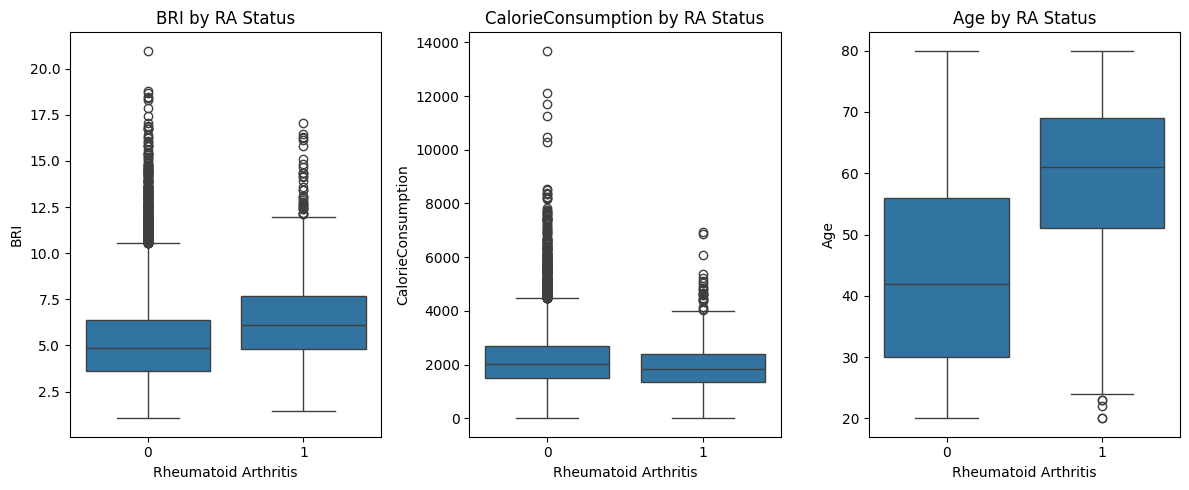

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

cols = ['BRI','CalorieConsumption', 'Age']

plt.figure(figsize=(12, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='RheumatoidArthritis', y=col)
    plt.title(f"{col} by RA Status")
    plt.xlabel("Rheumatoid Arthritis")
    plt.tight_layout()

plt.show()

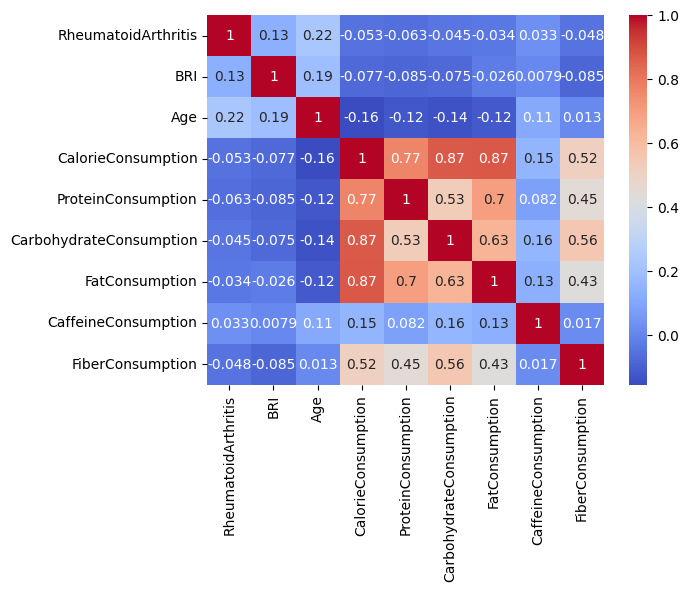

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [20]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

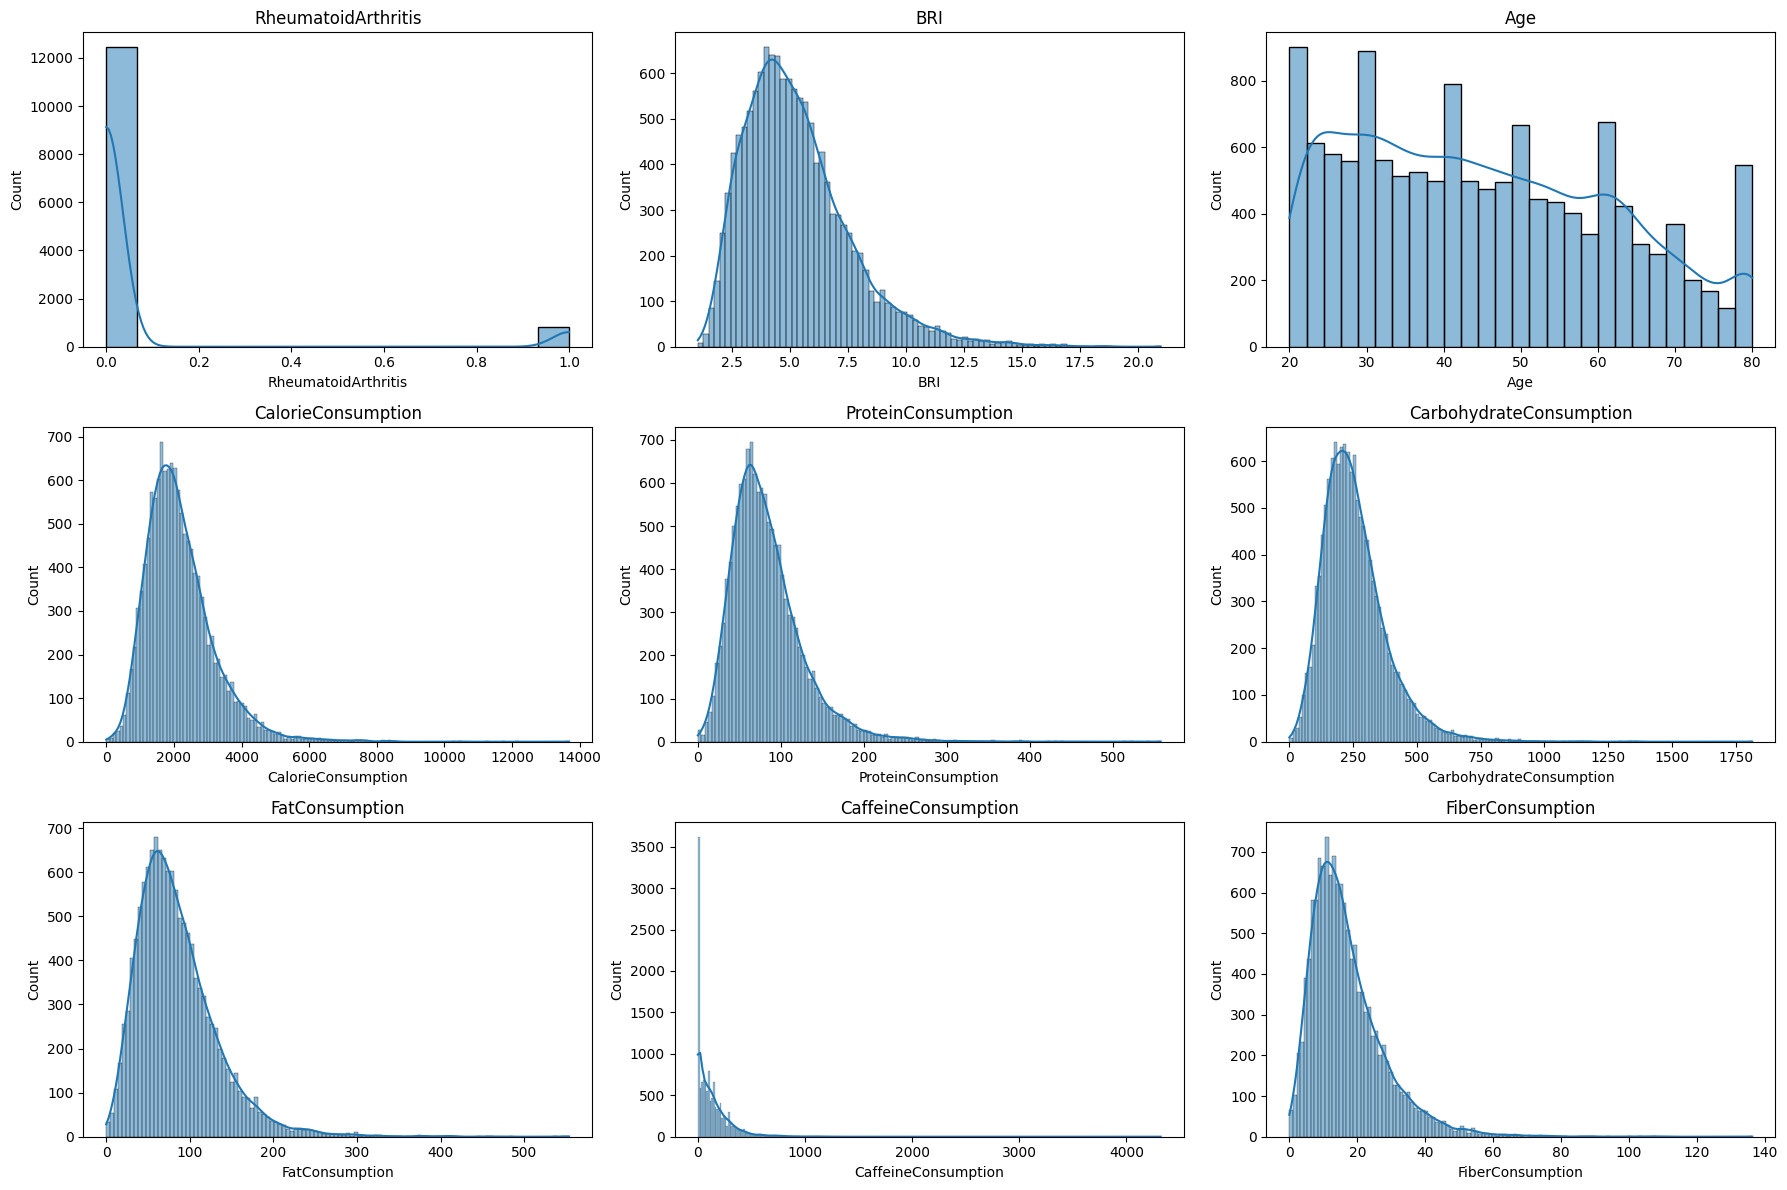

In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

rows = int(np.ceil(len(num_cols) / 3))
cols = 3

plt.figure(figsize=(18, rows*4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [22]:
def outlier_summary(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers

print("\n--> Outlier counts per feature:")
for col in num_cols:
    print(f"{col}: {outlier_summary(df[col])}")


--> Outlier counts per feature:
RheumatoidArthritis: 830
BRI: 404
Age: 0
CalorieConsumption: 387
ProteinConsumption: 472
CarbohydrateConsumption: 406
FatConsumption: 393
CaffeineConsumption: 537
FiberConsumption: 488


In [23]:
df.drop(columns=['CarbohydrateConsumption','FatConsumption','ProteinConsumption','FiberConsumption'],inplace=True)

In [24]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'CaffeineConsumption'],
      dtype='object')

In [25]:
cat_cols = ['Gender','Race','EducationLevel','MaritalStatus','FamilyIncome',
            'PhysicalActivity','SmokingStatus','DrinkingStatus',
            'Hypertension','Diabetes','Hyperlipidemia']

for col in cat_cols:
    print(f"\n--- {col} vs RA ---")
    print(pd.crosstab(df[col], df['RheumatoidArthritis'], normalize='index'))


--- Gender vs RA ---
RheumatoidArthritis         0         1
Gender                                 
Female               0.926082  0.073918
Male                 0.948152  0.051848

--- Race vs RA ---
RheumatoidArthritis         0         1
Race                                   
Mexican American     0.945676  0.054324
Non-Hispanic Black   0.912095  0.087905
Non-Hispanic White   0.937212  0.062788
Other                0.955792  0.044208

--- EducationLevel vs RA ---
RheumatoidArthritis          0         1
EducationLevel                          
Above high school     0.948003  0.051997
Below high school     0.915226  0.084774
High school graduate  0.926871  0.073129

--- MaritalStatus vs RA ---
RheumatoidArthritis           0         1
MaritalStatus                            
Living Alone           0.932203  0.067797
Living With A Partner  0.941109  0.058891

--- FamilyIncome vs RA ---
RheumatoidArthritis         0         1
FamilyIncome                           
(1.3,3.5]         

In [26]:
cat_cols.remove('Race')



===== Gender vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Gender                        
Female               5951  475
Male                 6492  355

Row-wise Percentage:
RheumatoidArthritis          0         1
Gender                                  
Female               92.608154  7.391846
Male                 94.815248  5.184752


===== EducationLevel vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis      0    1
EducationLevel                 
Above high school     7548  414
Below high school     2170  201
High school graduate  2725  215

Row-wise Percentage:
RheumatoidArthritis           0         1
EducationLevel                           
Above high school     94.800301  5.199699
Below high school     91.522564  8.477436
High school graduate  92.687075  7.312925


===== MaritalStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis       0    1
MaritalStatus                   
Living Alone           5060  368
Living With A Partner  73

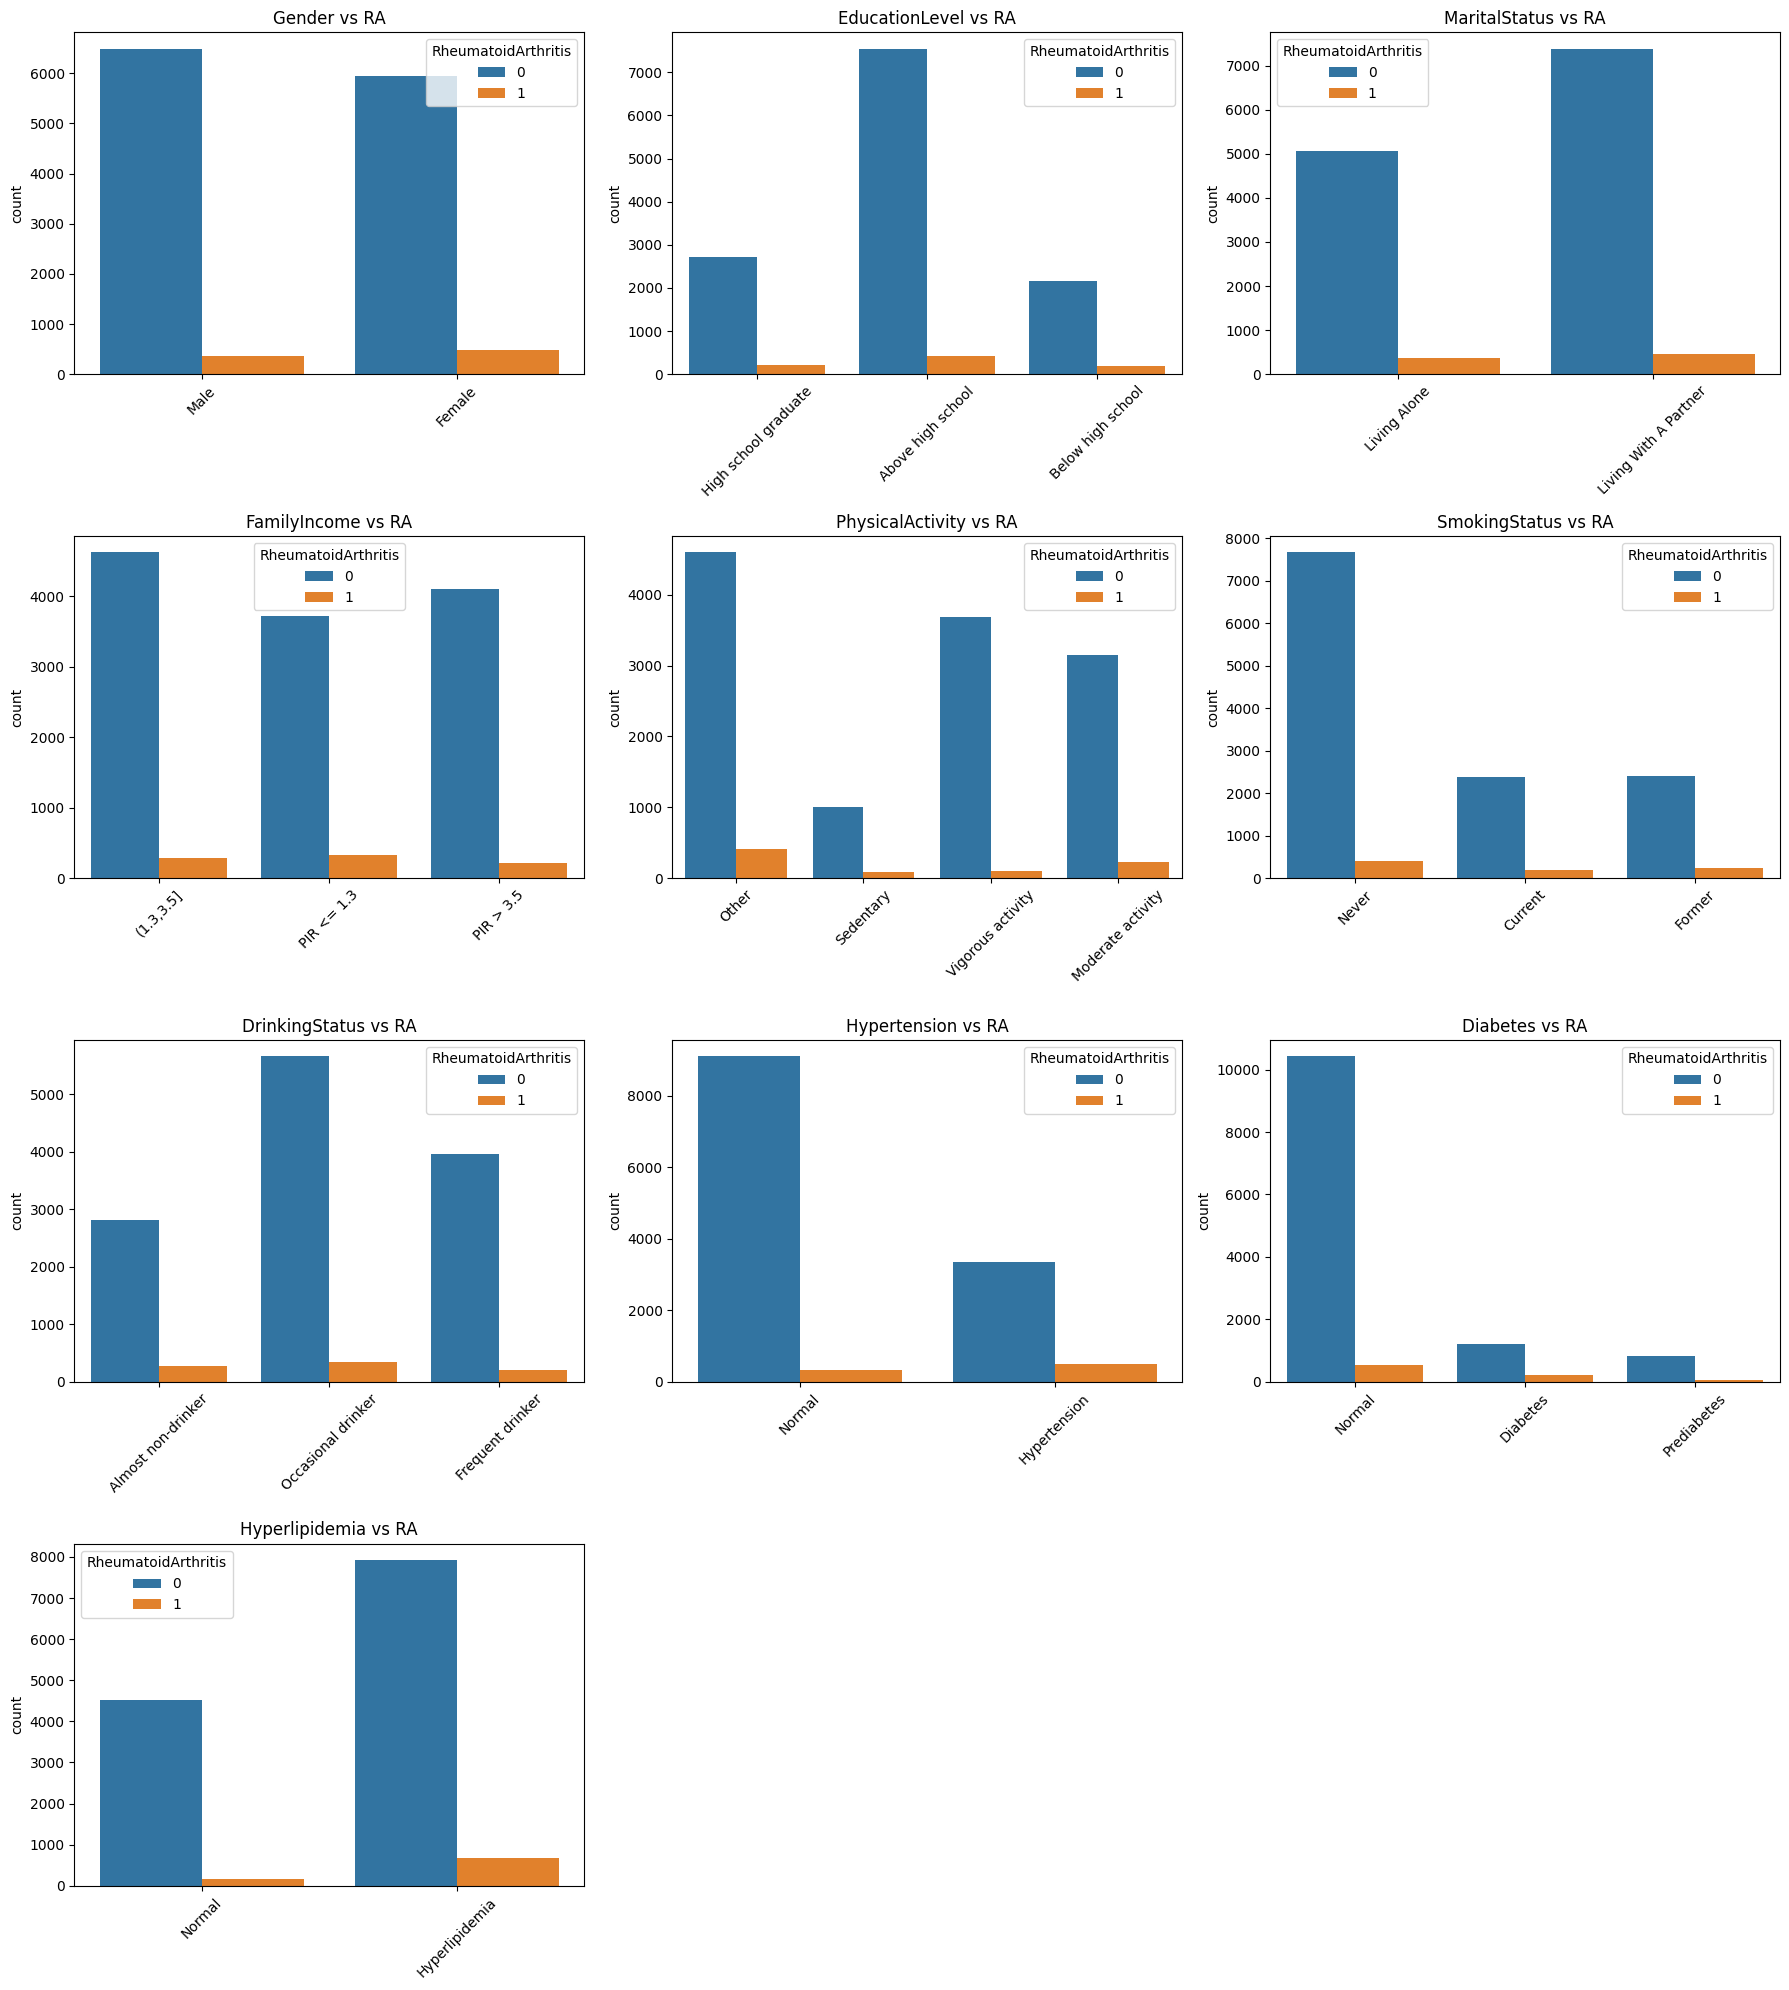

In [27]:
for col in cat_cols:
    print(f"\n\n===== {col} vs RheumatoidArthritis =====")

    # Crosstab
    ct = pd.crosstab(df[col], df['RheumatoidArthritis'])
    print("\nCounts:")
    print(ct)

    print("\nRow-wise Percentage:")
    print(ct.div(ct.sum(axis=1), axis=0) * 100)

n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='RheumatoidArthritis')
    plt.title(f"{col} vs RA")
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.tight_layout()

plt.show()


/var/folders/wy/pyd6gfbj0rn5k7yr6hcsygdw0000gn/T/ipykernel_28155/1359488541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='RheumatoidArthritis', ylabel='count'>

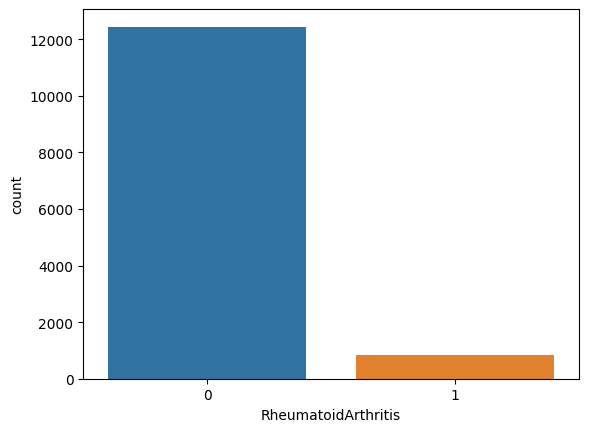

In [28]:
sns.countplot(
    data=df,
    x="RheumatoidArthritis",
    palette=["#1f77b4", "#ff7f0e"]   # specify two colors
)


# Data Preprocessing & Feature Engineering

In [29]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,45,60,100], labels=['Young','Adult','MidAge','Old'])

df['CalorieConsumption'] = df.apply(
    lambda row: df[
        (df['Gender'] == row['Gender']) &
        (df['AgeGroup'] == row['AgeGroup'])
    ]['CalorieConsumption'].median()
    if row['CalorieConsumption'] == 0 else row['CalorieConsumption'],
    axis=1
)

We created age groups from the Age column, and replaced zero CalorieConsumption values with the median calorie intake of people from the same gender and age group to make the data more realistic.

In [30]:
Q1 = df['CalorieConsumption'].quantile(0.25)
Q3 = df['CalorieConsumption'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['CalorieConsumption'].quantile(0.995))

df['CalorieConsumption'] = df['CalorieConsumption'].clip(lower=800, upper=upper)

In [31]:
Q1 = df['BRI'].quantile(0.25)
Q3 = df['BRI'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['BRI'].quantile(0.995))

df['BRI'] = df['BRI'].clip(lower=1.0, upper=upper)

In [32]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Living Alone':0,'Living With A Partner':1})
df['Hypertension'] = df['Hypertension'].map({'Normal':0,'Hypertension':1})
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Normal':0,'Hyperlipidemia':1})

In [33]:
df['EducationLevel'] = df['EducationLevel'].map({
    'Below high school':0,
    'High school graduate':1,
    'Above high school':2
})

In [34]:
df['Diabetes'] = df['Diabetes'].map({'Normal':0,'Prediabetes':1,'Diabetes':2})

In [35]:
df['SmokingStatus'] = df['SmokingStatus'].map({'Never':0,'Former':1,'Current':2})

In [36]:
df['DrinkingStatus'] = df['DrinkingStatus'].map({
    'Almost non-drinker':2,
    'Occasional drinker':1,
    'Frequent drinker':0
})

In [37]:
df['FamilyIncome'] = df['FamilyIncome'].map({
    'PIR <= 1.3':0,
    '(1.3,3.5]':1,
    'PIR > 3.5':2
})

In [38]:
df = pd.get_dummies(df, columns=['Race','PhysicalActivity'], drop_first=True)

In [39]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'SmokingStatus', 'DrinkingStatus',
       'Hypertension', 'Diabetes', 'Hyperlipidemia', 'CalorieConsumption',
       'CaffeineConsumption', 'AgeGroup', 'Race_Non-Hispanic Black',
       'Race_Non-Hispanic White', 'Race_Other', 'PhysicalActivity_Other',
       'PhysicalActivity_Sedentary', 'PhysicalActivity_Vigorous activity'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   RheumatoidArthritis                 13273 non-null  int64   
 1   BRI                                 13273 non-null  float64 
 2   Gender                              13273 non-null  int64   
 3   Age                                 13273 non-null  int64   
 4   EducationLevel                      13273 non-null  int64   
 5   MaritalStatus                       13273 non-null  int64   
 6   FamilyIncome                        13273 non-null  int64   
 7   SmokingStatus                       13273 non-null  int64   
 8   DrinkingStatus                      13273 non-null  int64   
 9   Hypertension                        13273 non-null  int64   
 10  Diabetes                            13273 non-null  int64   
 11  Hyperlipidemia              

# Models

### Logistic Regression

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve
)

TARGET = "RheumatoidArthritis"

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

for col in X.columns:
    if X[col].dtype == "object" or str(X[col].dtype) == "category":
        X[col] = X[col].astype(str)

numeric_cols = ['BRI', 'Age', 'CalorieConsumption', 'CaffeineConsumption']
numeric_cols = [c for c in numeric_cols if c in X.columns]

categorical_cols = [c for c in X.columns if c not in numeric_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

pipeline = Pipeline([
    ("prep", preprocessor),
    ("logreg", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        solver="lbfgs",
        random_state=42
    ))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

pipeline.fit(X_train, y_train)

y_prob_train = pipeline.predict_proba(X_train)[:, 1]
y_prob_test = pipeline.predict_proba(X_test)[:, 1]

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

print("\n========== DEFAULT TRAIN PERFORMANCE ==========")
print("Accuracy :", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, zero_division=0))
print("Recall   :", recall_score(y_train, y_pred_train))
print("F1-score :", f1_score(y_train, y_pred_train))
print("ROC-AUC  :", roc_auc_score(y_train, y_prob_train))

print("\n========== DEFAULT TEST PERFORMANCE ==========")
print("Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_test))
print("F1-score :", f1_score(y_test, y_pred_test))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_test))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test, zero_division=0))

desired_threshold = 0.53

y_pred_custom = (y_prob_test >= desired_threshold).astype(int)

print("\n========== CUSTOM THRESHOLD RESULTS ==========")
print("Custom Threshold:", desired_threshold)
print("Accuracy :", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_custom))
print("F1-score :", f1_score(y_test, y_pred_custom))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom, zero_division=0))


========== DEFAULT TRAIN PERFORMANCE ==========
Accuracy : 0.7060651723488416
Precision: 0.15049786628733997
Recall   : 0.7966867469879518
F1-score : 0.2531706149796602
ROC-AUC  : 0.818250095015384

========== DEFAULT TEST PERFORMANCE ==========
Accuracy : 0.6986817325800376
Precision: 0.14301801801801803
Recall   : 0.7650602409638554
F1-score : 0.2409867172675522
ROC-AUC  : 0.778679200530527

Confusion Matrix (Test):
[[1728  761]
 [  39  127]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2489
           1       0.14      0.77      0.24       166

    accuracy                           0.70      2655
   macro avg       0.56      0.73      0.53      2655
weighted avg       0.93      0.70      0.78      2655


========== CUSTOM THRESHOLD RESULTS ==========
Custom Threshold: 0.53
Accuracy : 0.7235404896421845
Precision: 0.14676616915422885
Recall   : 0.7108433734939759
F1-score : 0.24329896907216494

### XGBoost

In [43]:
target = "RheumatoidArthritis"
X = df.drop(columns=[target])
y = df[target]

In [44]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['BRI', 'Gender', 'Age', 'EducationLevel', 'MaritalStatus', 'FamilyIncome', 'SmokingStatus', 'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia', 'CalorieConsumption', 'CaffeineConsumption']
Categorical features: ['AgeGroup']


In [45]:
cat_indices = [X.columns.get_loc(col) for col in categorical_features]

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [56]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

model = XGBClassifier(
    random_state=42,
    eval_metric="aucpr",
    scale_pos_weight=18,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=500,
    subsample=0.4,
    colsample_bytree=0.6
)
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])

In [65]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [66]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve


acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

Accuracy: 0.7581920903954802

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      2489
           1       0.15      0.63      0.25       166

    accuracy                           0.76      2655
   macro avg       0.56      0.70      0.55      2655
weighted avg       0.92      0.76      0.82      2655


Confusion Matrix:
 [[1908  581]
 [  61  105]]

ROC-AUC Score: 0.7602825928059364


### LightGBM

In [67]:
from lightgbm import LGBMClassifier

In [68]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos if pos > 0 else 1.0
print(f"Train counts: neg={neg}, pos={pos}, scale_pos_weight={scale_pos_weight:.2f}")

Train counts: neg=9954, pos=664, scale_pos_weight=14.99


In [69]:
class_weight = {0:1.0, 1: float(neg/pos)} if pos>0 else 'balanced'

In [70]:
lgbm = LGBMClassifier(
    random_state=42,
    n_estimators=850,
    learning_rate=0.01,
    num_leaves=50,
    subsample=0.8,
    colsample_bytree=0.6,
    class_weight=class_weight,
    n_jobs=0
)

pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgbm)
])


In [71]:
pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 664, number of negative: 9954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 10618, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
y_pred = pipeline_lgbm.predict(X_test)
y_prob = pipeline_lgbm.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8342749529190208
ROC-AUC: 0.7475809223232827

Classification Report:
               precision    recall  f1-score   support

           0      0.958     0.861     0.907      2489
           1      0.171     0.428     0.244       166

    accuracy                          0.834      2655
   macro avg      0.564     0.645     0.575      2655
weighted avg      0.908     0.834     0.865      2655

Confusion Matrix:
 [[2144  345]
 [  95   71]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Catboost

In [74]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

cat_features = list(X.select_dtypes(include=['object','category']).columns)
print("Categorical:", cat_features)

model = CatBoostClassifier(
    iterations=1200,
    depth=6,
    learning_rate=0.03,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[1, (y_train==0).sum()/(y_train==1).sum()],
    verbose=False,
    random_seed=42
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False
)

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:,1]

train_acc = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)

print("\n=== TRAINING PERFORMANCE ===")
print("Train Accuracy:", round(train_acc, 3))
print("Train ROC-AUC:", round(train_auc, 3))

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:,1]

test_acc = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

print("\n=== TEST PERFORMANCE ===")
print("Test Accuracy:", round(test_acc, 3))
print("Test ROC-AUC:", round(test_auc, 3))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, digits=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Categorical: ['AgeGroup']

=== TRAINING PERFORMANCE ===
Train Accuracy: 0.718
Train ROC-AUC: 0.874

=== TEST PERFORMANCE ===
Test Accuracy: 0.697
Test ROC-AUC: 0.769

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81      2489
           1       0.14      0.72      0.23       166

    accuracy                           0.70      2655
   macro avg       0.56      0.71      0.52      2655
weighted avg       0.92      0.70      0.77      2655

Confusion Matrix:
 [[1730  759]
 [  46  120]]


In [75]:
from sklearn.metrics import precision_recall_curve

y_prob = model.predict_proba(X_test)[:, 1]

prec, rec, thr = precision_recall_curve(y_test, y_prob)
f2_scores = (5 * prec * rec) / (4 * prec + rec + 1e-12)

best_idx = f2_scores.argmax()
best_threshold = thr[best_idx]

print("Best threshold:", best_threshold)

y_pred_new = (y_prob >= best_threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_new, digits=2))
print(confusion_matrix(y_test, y_pred_new))

Best threshold: 0.5346650227295889
Accuracy: 0.728060263653484
ROC-AUC: 0.7691456868050749
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      2489
           1       0.15      0.69      0.24       166

    accuracy                           0.73      2655
   macro avg       0.56      0.71      0.54      2655
weighted avg       0.92      0.73      0.80      2655

[[1819  670]
 [  52  114]]
